In [96]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import seaborn as sns
import warnings

In [176]:
train=pd.read_csv('train.csv')
campaign_data=pd.read_csv('campaign_data.csv')
coupon_item_mapping=pd.read_csv('coupon_item_mapping.csv')
customer_demographics=pd.read_csv('customer_demographics.csv')
customer_transaction_data=pd.read_csv('customer_transaction_data.csv')
item_data=pd.read_csv('item_data.csv')

In [177]:
test=pd.read_csv('test.csv')

In [178]:
print ('Train count:'+ str(len(train)))
print ('Test count:'+ str(len(test)))
print ('campaign_data count:'+ str(len(campaign_data)))
print ('coupon_item_mapping count:'+ str(len(coupon_item_mapping)))
print ('customer_demographics count:'+ str(len(customer_demographics)))
print ('customer_transaction_data count:'+ str(len(customer_transaction_data)))
print ('item_data count:'+ str(len(item_data)))

Train count:78369
Test count:50226
campaign_data count:28
coupon_item_mapping count:92663
customer_demographics count:760
customer_transaction_data count:1324566
item_data count:74066


In [99]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [226]:
test.head()

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811


In [100]:
##Find duplicate records
train[train.duplicated(['campaign_id','coupon_id','customer_id'])==True]

,id,campaign_id,coupon_id,customer_id,redemption_status
24627,40421,13,450,15,1
42928,70413,8,6,1210,1
43301,70999,13,468,1549,1
48626,79727,13,20,1574,1
49749,81601,8,906,1115,1
51937,85240,13,754,1250,1
59747,98171,29,443,659,1
64294,105566,10,689,389,1
64544,105957,13,726,959,1
73994,121513,5,689,626,1


In [101]:
campaign_data.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [179]:
train_copy=train
test_copy=test

In [103]:
customer_demographics.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [180]:
#data=pd.merge(train,customer_demographics,how='left')

In [181]:
#data_test=pd.merge(test,customer_demographics,how='left')

In [105]:
data[data['no_of_children'].isnull()]

,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,13,27,1053,0,46-55,NaN,0.0,1,NaN,5.0
1,2,13,116,48,0,36-45,Married,0.0,2,NaN,3.0
2,6,9,635,205,0,46-55,Married,0.0,2,NaN,7.0
3,7,13,644,1050,0,NaN,NaN,NaN,NaN,NaN,NaN
4,9,8,1017,1489,0,46-55,Married,0.0,2,NaN,3.0
6,14,9,444,590,0,36-45,NaN,0.0,2,NaN,1.0
7,15,29,538,368,0,36-45,NaN,0.0,1,NaN,5.0
8,17,30,857,523,0,NaN,NaN,NaN,NaN,NaN,NaN
9,19,2,559,679,0,36-45,Single,1.0,2,NaN,4.0
10,20,9,575,108,0,46-55,NaN,0.0,1,NaN,5.0


In [106]:
data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,13,27,1053,0,46-55,NaN,0.0,1,NaN,5.0
1,2,13,116,48,0,36-45,Married,0.0,2,NaN,3.0
2,6,9,635,205,0,46-55,Married,0.0,2,NaN,7.0
3,7,13,644,1050,0,NaN,NaN,NaN,NaN,NaN,NaN
4,9,8,1017,1489,0,46-55,Married,0.0,2,NaN,3.0


In [182]:
cust_demo_data=pd.merge(train,customer_demographics,how='left')

In [183]:
test_cust_demo_data=pd.merge(test,customer_demographics,how='left')

In [108]:
campaign_data.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [184]:
campaign_data=pd.merge(train,campaign_data,how='left')

In [185]:
test_campaign_data=pd.merge(test,campaign_data,how='left')

In [186]:
coupon_item_data=pd.merge(coupon_item_mapping,item_data ,how='inner')

In [111]:
coupon_item_data.head()

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,6,37,56,Local,Grocery
2,22,37,56,Local,Grocery
3,31,37,56,Local,Grocery
4,107,75,56,Local,Grocery


In [112]:
len(coupon_item_data)

92663

In [113]:
coupon_item_data['category'].value_counts()

Grocery                   36466
Pharmaceutical            25061
Natural Products           6819
Meat                       6218
Packaged Meat              6144
Skin & Hair Care           4924
Seafood                    2227
Flowers & Plants           1963
Dairy, Juices & Snacks     1867
Garden                      286
Prepared Food               240
Miscellaneous               184
Bakery                      100
Salads                      100
Travel                       44
Vegetables (cut)             19
Restauarant                   1
Name: category, dtype: int64

In [228]:
#Distinct count for Category
coupon_item_data.groupby('coupon_id')['category'].value_counts()

coupon_id  category              
1          Natural Products            30
           Grocery                      9
2          Grocery                      2
3          Grocery                     17
4          Grocery                     24
5          Pharmaceutical               7
6          Grocery                   3082
           Dairy, Juices & Snacks     259
           Packaged Meat              242
           Seafood                    128
           Meat                         2
7          Natural Products          1880
           Flowers & Plants           642
           Dairy, Juices & Snacks     224
           Garden                      94
           Miscellaneous               37
           Salads                      18
           Grocery                     17
           Travel                      10
           Vegetables (cut)             7
           Pharmaceutical               4
           Bakery                       3
           Seafood                      3


In [188]:
customer_transaction_data =pd.merge(customer_transaction_data ,item_data ,how='inner')

In [189]:
print ('cust_demo_data count:'+ str(len(cust_demo_data)))
print ('test_cust_demo_data count:'+ str(len(test_cust_demo_data)))
print ('campaign_data count:'+ str(len(campaign_data)))
print ('test_campaign_data count:'+ str(len(test_campaign_data)))
print ('coupon_item_data  count:'+ str(len(coupon_item_data )))
print ('customer_transaction_data count:'+ str(len(customer_transaction_data)))

cust_demo_data count:78369
test_cust_demo_data count:50226
campaign_data count:78369
test_campaign_data count:50226
coupon_item_data  count:92663
customer_transaction_data count:1324566


In [117]:
cust_demo_data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,13,27,1053,0,46-55,NaN,0.0,1,NaN,5.0
1,2,13,116,48,0,36-45,Married,0.0,2,NaN,3.0
2,6,9,635,205,0,46-55,Married,0.0,2,NaN,7.0
3,7,13,644,1050,0,NaN,NaN,NaN,NaN,NaN,NaN
4,9,8,1017,1489,0,46-55,Married,0.0,2,NaN,3.0


In [118]:
campaign_data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date
0,1,13,27,1053,0,X,19/05/13,05/07/13
1,2,13,116,48,0,X,19/05/13,05/07/13
2,6,9,635,205,0,Y,11/03/13,12/04/13
3,7,13,644,1050,0,X,19/05/13,05/07/13
4,9,8,1017,1489,0,X,16/02/13,05/04/13


In [119]:
len(campaign_data[campaign_data['coupon_id']==105])

176

In [120]:
coupon_item_data.head()

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,6,37,56,Local,Grocery
2,22,37,56,Local,Grocery
3,31,37,56,Local,Grocery
4,107,75,56,Local,Grocery


In [121]:
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,56,Local,Natural Products
1,2012-01-02,135,26830,1,35.26,-10.69,0.0,56,Local,Natural Products
2,2012-01-02,464,26830,1,35.26,-10.69,0.0,56,Local,Natural Products
3,2012-01-12,1185,26830,1,45.95,0.00,0.0,56,Local,Natural Products
4,2012-01-13,1140,26830,1,45.95,0.00,0.0,56,Local,Natural Products


In [197]:
data=pd.merge(cust_demo_data,campaign_data)

In [190]:
data_test=pd.merge(test_cust_demo_data,test_campaign_data)

In [198]:
data=pd.merge(data,coupon_item_data)

In [191]:
data_test=pd.merge(data_test,coupon_item_data)

In [199]:
data=pd.merge(data,customer_transaction_data)

In [192]:
data_test=pd.merge(data_test,customer_transaction_data)

In [193]:
len(data_test)

124628

In [200]:
len(data)

141060

In [201]:
data.describe()

,id,campaign_id,coupon_id,customer_id,redemption_status,rented,income_bracket,item_id,brand,quantity,selling_price,other_discount,coupon_discount
count,141060.000000,141060.000000,141060.000000,141060.000000,141060.000000,94855.000000,94855.000000,141060.000000,141060.000000,141060.000000,141060.000000,141060.000000,141060.000000
mean,62839.250985,12.023203,276.511421,823.318637,0.137941,0.055295,5.016393,29013.623912,863.520268,1.323486,106.648661,-22.048106,-1.228815
std,37092.152854,5.430278,353.061584,470.664193,0.344840,0.228556,2.311960,17842.136637,1035.260871,0.862037,101.426463,38.386162,7.630325
min,15.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,1.000000,1.000000,0.710000,-1175.100000,-534.300000
25%,30373.000000,8.000000,21.000000,432.000000,0.000000,0.000000,4.000000,14092.000000,58.000000,1.000000,53.430000,-31.700000,0.000000
50%,63676.000000,13.000000,23.000000,822.000000,0.000000,0.000000,5.000000,25734.000000,673.000000,1.000000,88.690000,-7.120000,0.000000
75%,94616.000000,13.000000,586.000000,1239.000000,0.000000,0.000000,6.000000,37245.000000,1134.000000,1.000000,124.310000,0.000000,0.000000
max,128595.000000,30.000000,1115.000000,1582.000000,1.000000,1.000000,12.000000,74054.000000,5468.000000,54.000000,4593.910000,0.000000,0.000000


In [127]:
#count no of null 
data.isna().sum()

id                        0
campaign_id               0
coupon_id                 0
customer_id               0
redemption_status         0
age_range             46205
marital_status        82501
rented                46205
family_size           46205
no_of_children       106338
income_bracket        46205
campaign_type             0
start_date                0
end_date                  0
item_id                   0
brand                     0
brand_type                0
category                  0
date                      0
quantity                  0
selling_price             0
other_discount            0
coupon_discount           0
dtype: int64

In [128]:
data['age_range'].value_counts()

46-55    31052
36-45    26815
26-35    19603
56-70     6770
70+       5987
18-25     4628
Name: age_range, dtype: int64

In [129]:
data['age_range'].mode()

0    46-55
dtype: object

In [202]:
data['age_range'].fillna(data['age_range'].mode()[0], inplace=True)
data_test['age_range'].fillna(data_test['age_range'].mode()[0], inplace=True)

In [131]:
data['age_range'].isna().sum()

0

In [132]:
data['marital_status'].value_counts()

Married    45162
Single     13397
Name: marital_status, dtype: int64

In [203]:
data['marital_status'].fillna(data['marital_status'].mode()[0], inplace=True)
data_test['marital_status'].fillna(data_test['marital_status'].mode()[0], inplace=True)

In [134]:
data['rented'].value_counts()

0.0    89610
1.0     5245
Name: rented, dtype: int64

In [204]:
data['rented'].fillna(data['rented'].mode()[0], inplace=True)
data_test['rented'].fillna(data_test['rented'].mode()[0], inplace=True)

In [136]:
data['family_size'].value_counts()

2     35823
1     27055
3     14514
4      8892
5+     8571
Name: family_size, dtype: int64

In [205]:
data['family_size'].fillna(data['family_size'].mode()[0], inplace=True)
data_test['family_size'].fillna(data_test['family_size'].mode()[0], inplace=True)

In [206]:
data['no_of_children'].fillna(data['no_of_children'].mode()[0], inplace=True)
data_test['no_of_children'].fillna(data_test['no_of_children'].mode()[0], inplace=True)

In [139]:
data['income_bracket'].value_counts()

5.0     27692
4.0     17504
6.0     11792
1.0      7707
3.0      6156
8.0      5627
2.0      5431
7.0      4817
9.0      4557
12.0     1867
10.0     1342
11.0      363
Name: income_bracket, dtype: int64

In [208]:
data['income_bracket'].fillna(data['income_bracket'].mode()[0], inplace=True)
data_test['income_bracket'].fillna(data_test['income_bracket'].mode()[0], inplace=True)

In [141]:
data.isna().sum()

id                   0
campaign_id          0
coupon_id            0
customer_id          0
redemption_status    0
age_range            0
marital_status       0
rented               0
family_size          0
no_of_children       0
income_bracket       0
campaign_type        0
start_date           0
end_date             0
item_id              0
brand                0
brand_type           0
category             0
date                 0
quantity             0
selling_price        0
other_discount       0
coupon_discount      0
dtype: int64

In [225]:
data_test.isna().sum()

campaign_id                             0
coupon_id                               0
customer_id                             0
rented                                  0
income_bracket                          0
redemption_status                  124628
item_id                                 0
brand                                   0
quantity                                0
selling_price                           0
other_discount                          0
coupon_discount                         0
age_range_18-25                         0
age_range_26-35                         0
age_range_36-45                         0
age_range_46-55                         0
age_range_56-70                         0
age_range_70+                           0
marital_status_Married                  0
marital_status_Single                   0
family_size_1                           0
family_size_2                           0
family_size_3                           0
family_size_4                     

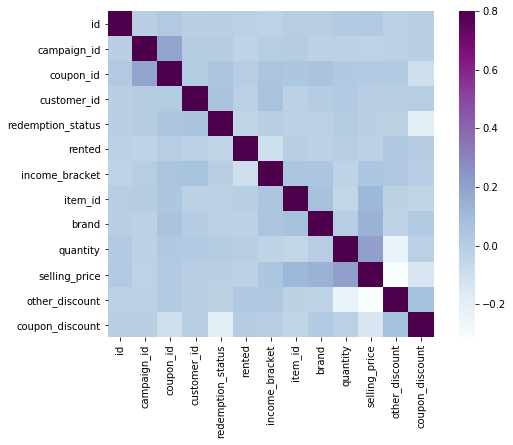

In [142]:
matrix = data.corr()
ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [212]:
#Drop id columns
#data=data.drop(['id',axis=1]
data=data.drop(['id','date','start_date','end_date'],axis=1)

In [214]:
#data_test=data_test.drop(['id',axis=1]
data_test=data_test.drop(['id','date','start_date','end_date'],axis=1)               

In [215]:
X = data.drop('redemption_status',1) 


In [216]:
y = data.redemption_status

In [217]:
X=pd.get_dummies(X) 
data=pd.get_dummies(data) 

In [223]:
data_test=pd.get_dummies(data_test) 

In [158]:
data.head()

,campaign_id,coupon_id,customer_id,redemption_status,rented,income_bracket,item_id,brand,quantity,selling_price,...,category_Miscellaneous,category_Natural Products,category_Packaged Meat,category_Pharmaceutical,category_Prepared Food,category_Salads,category_Seafood,category_Skin & Hair Care,category_Travel,category_Vegetables (cut)
0,13,27,351,0,0.0,5.0,5835,1636,1,62.33,...,0,0,0,0,0,0,0,0,0,0
1,13,27,351,0,0.0,5.0,9515,1105,1,85.13,...,0,0,0,0,0,0,0,0,0,0
2,13,27,351,0,0.0,5.0,9515,1105,1,106.86,...,0,0,0,0,0,0,0,0,0,0
3,13,27,351,0,0.0,5.0,9515,1105,1,106.86,...,0,0,0,0,0,0,0,0,0,0
4,13,27,351,0,0.0,5.0,12957,1105,1,71.24,...,0,0,0,0,0,0,0,0,0,0


In [159]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141060 entries, 0 to 141059
Data columns (total 47 columns):
campaign_id                        141060 non-null int64
coupon_id                          141060 non-null int64
customer_id                        141060 non-null int64
rented                             141060 non-null float64
income_bracket                     141060 non-null float64
item_id                            141060 non-null int64
brand                              141060 non-null int64
quantity                           141060 non-null int64
selling_price                      141060 non-null float64
other_discount                     141060 non-null float64
coupon_discount                    141060 non-null float64
age_range_18-25                    141060 non-null uint8
age_range_26-35                    141060 non-null uint8
age_range_36-45                    141060 non-null uint8
age_range_46-55                    141060 non-null uint8
age_range_56-70         

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141060 entries, 0 to 141059
Data columns (total 19 columns):
campaign_id          141060 non-null int64
coupon_id            141060 non-null int64
customer_id          141060 non-null int64
redemption_status    141060 non-null int64
age_range            141060 non-null object
marital_status       141060 non-null object
rented               141060 non-null float64
family_size          141060 non-null object
no_of_children       141060 non-null object
income_bracket       141060 non-null float64
campaign_type        141060 non-null object
item_id              141060 non-null int64
brand                141060 non-null int64
brand_type           141060 non-null object
category             141060 non-null object
quantity             141060 non-null int64
selling_price        141060 non-null float64
other_discount       141060 non-null float64
coupon_discount      141060 non-null float64
dtypes: float64(5), int64(7), object(7)
memory usage: 2

In [218]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [219]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,penalty='l2', random_state=1, solver='liblinear', tol=0.0001,verbose=0, warm_start=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [220]:
#Let’s predict the Loan_Status for validation set and calculate its accuracy.

pred_cv = model.predict(x_cv)

#Let us calculate how accurate our predictions are by calculating the accuracy.

accuracy_score(y_cv,pred_cv)

0.8654709579847819

In [224]:

#Let’s make predictions for the test dataset.

pred_test = model.predict(data_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').